# t-plot calculations

Another common characterisation method is the t-plot method. First, make sure the data is imported by running the previous notebook.

In [1]:
%run import.ipynb

Selected 0 samples
Selected 23 adsorbates
Selected 5 isotherms with nitrogen at 77K
Selected 2 room temperature calorimetry isotherms
Selected 2 isotherms for IAST calculation
Selected 3 isotherms for isosteric heat calculation


This method requires, besides the isotherm, a so-called thickness function which describes the thickness of adsorbate on a non-porous surface. It can be specified by the user, or otherwise the "Harkins and Jura" thickness model is used as default. When the function is called without any other parameters, the framework will attempt to find plateaus in the data and automatically fit them with a straight line.

Let's look again at the our MCM-41 pore-controlled glass.

MCM-41
For linear region 0
The slope is 0.01 and the intercept is 0.0002 With a correlation coefficient of 1.0
The adsorbed volume is 0.0055 and the area is 347.59
For linear region 1
The slope is 0.0019 and the intercept is 0.008 With a correlation coefficient of 0.9994
The adsorbed volume is 0.2786 and the area is 66.7436


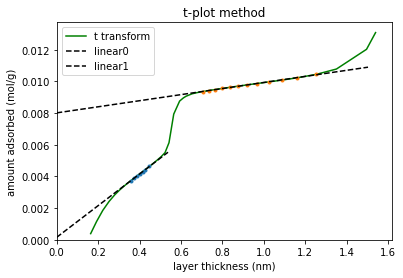

In [2]:
print(isotherms_n2_77k[0].sample_name)
pygaps.t_plot(isotherms_n2_77k[0], verbose=True)
plt.show()

The first line can be atributed to adsorption on the pore surface, while the second one is adsorption on the external surface after pore filling. Two values are calculated for each section detected: the adsorbed volume and the area. In this case, the area of the first linear region corresponds to the pore area. Compare the specific surface area obtained of 350 $m^2$ with the 360 $m^2$ obtained through the BET method previously. 

In the second region, the adsorbed volume corresponds to the total pore volume and the area is the external surface area of the sample. 

We can get a better result for the surface area by attempting to have the first linear region at a zero intercept. 

MCM-41
For linear region 0
The slope is 0.0103 and the intercept is 0.0 With a correlation coefficient of 0.9996
The adsorbed volume is 0.0013 and the area is 357.9359


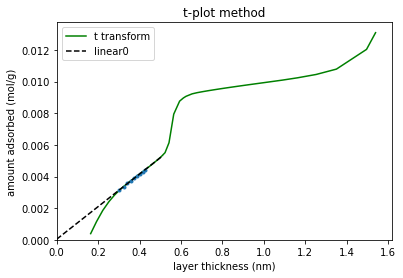

In [3]:
print(isotherms_n2_77k[0].sample_name)
pygaps.t_plot(isotherms_n2_77k[0], thickness_model='Harkins/Jura', 
              limits=(0.3,0.44), verbose=True)
plt.show()

A near perfect match with the BET method. Of course, the method is only this accurate in certain cases. Let's do the calculations for all the nitrogen isotherms, using the same assumption that the first linear region is a good indicator of surface area.

In [4]:
results = []
for isotherm in isotherms_n2_77k:
    results.append((isotherm.sample_name, pygaps.t_plot(isotherm, 'Harkins/Jura')))
    
[(x, y['results'][0].get('area')) for (x,y) in results]

[('MCM-41', 347.58998425445463),
 ('NaY', 199.76857853542617),
 ('SiO2', 249.13912142719283),
 ('Takeda 5A', 99.549157597586699),
 ('UiO-66(Zr)', 17.771763681552319)]

We can see that, while we get reasonable values for the silica samples, all the rest are quite different. This is due to a number of factors depending on the material, with ultramicroporous condensation and adsorbate-adsorbent interactions having an effect on the thickness of the layer. The t-plot requires careful thought to assign meaning to the calculated values.

Since no thickness model can be universal, the framework allows for the thickness model to be substituted with an user-provided function which will be used for the thickness calculation, or even another isotherm, which will be converted into a thickness model.

For example, using a carbon black type model:

Takeda 5A
For linear region 0
The slope is 0.0007 and the intercept is 0.0101 With a correlation coefficient of 0.9939
The adsorbed volume is 0.351 and the area is 23.5941


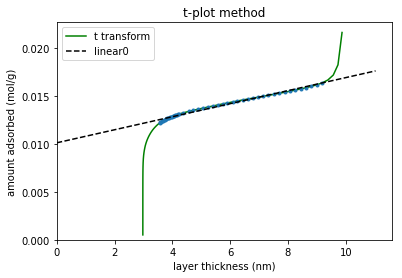

In [5]:
def carbon_model(relative_p):
    return 0.88*(relative_p**2) + 6.45*relative_p + 2.98 

print(isotherms_n2_77k[3].sample_name)
pygaps.t_plot(isotherms_n2_77k[3], thickness_model=carbon_model, verbose=True)
plt.show()

Isotherms which do not use nitrogen can also be used, but one should be careful that the thickness model is well chosen.

Now we'll use the $\alpha_s$ method in the [next notebook](alphas.ipynb).